**Model setup**

-Choose the model settings

-Apply needed configurations

In [1]:
# Choose loss function manually
# binary_crossentropy, categorical_crossentropy, sparse_categorical_crossentropy
loss_function = 'categorical_crossentropy'

# Enable data Augmentation 
# True, False (Only available for sparse_categorical_crossentropy)
enable_augmentation = True

# Choose the activation function manually 
# sigmoid, softmax
activation_function = "sigmoid" 
 
# Save/Load mode(Defines modes whether loading model or creating model and save)
# save, load
save_load = "load" 

# Define the training parameters for model and data generator
batch_size = 16
num_epochs = 30

# Define the main approaches
# Define the multi-lable functions
def ml_bf():
    enable_augmentation = False 
    loss_function = 'binary_crossentropy'
    activation_function = "sigmoid"
    return enable_augmentation, activation_function, loss_function

def ml_bt():
    enable_augmentation = True 
    loss_function = 'binary_crossentropy'
    activation_function = "sigmoid"
    return enable_augmentation, activation_function, loss_function

def ml_cfsd():
    enable_augmentation = False 
    loss_function = 'categorical_crossentropy'
    activation_function = "sigmoid"
    return enable_augmentation, activation_function, loss_function

def mc_ctsd():
    enable_augmentation = True 
    loss_function = 'categorical_crossentropy'
    activation_function = "sigmoid"
    return enable_augmentation, activation_function, loss_function

def ml_sfsd():
    enable_augmentation = False 
    loss_function = 'sparse_categorical_crossentropy'
    activation_function = "sigmoid"
    return enable_augmentation, activation_function, loss_function

def ml_stsd():
    enable_augmentation = True 
    loss_function = 'sparse_categorical_crossentropy'
    activation_function = "sigmoid"
    return enable_augmentation, activation_function, loss_function

# Define the multi-lable functions
def mc_cfsx():
    enable_augmentation = False 
    loss_function = 'categorical_crossentropy'
    activation_function = "softmax"
    return enable_augmentation, activation_function, loss_function
    
def mc_ctsx():
    enable_augmentation = True 
    loss_function = 'categorical_crossentropy'
    activation_function = "softmax"
    return enable_augmentation, activation_function, loss_function

def mc_sfsx():
    enable_augmentation = False 
    loss_function = 'sparse_categorical_crossentropy'
    activation_function = "softmax"
    return enable_augmentation, activation_function, loss_function

def mc_stsx():
    enable_augmentation = True 
    loss_function = 'sparse_categorical_crossentropy'
    activation_function = "softmax"
    return enable_augmentation, activation_function, loss_function

# ML: ml_bf, ml_bt, ml_cfsd, ml_sfsd, ml_stsd #MC: mc_cfsx, mc_sfsx, mc_stsx, mc_ctsd, mc_ctsx
enable_augmentation, activation_function, loss_function = mc_ctsx()
print(enable_augmentation, loss_function, activation_function)

True categorical_crossentropy softmax


**Importing necessary modules**

-Import all needed modules for the whole code in one cell.

-Sync with Google Drive.

In [2]:
# Import necessary modules
"""
Cell introduction:
-Import all needed modules for the whole code in one cell.
-Sync with Google Drive.
-Defining directories and file names

Functions refrences:
drive.mount: https://colab.research.google.com/notebooks/io.ipynb
"""
# _____________________________________________________________________________

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from keras import backend as K
from keras.applications.xception import preprocess_input, Xception 
from keras.callbacks import CSVLogger, EarlyStopping
from keras.layers import *
from keras.losses import categorical_crossentropy
from keras.losses import sparse_categorical_crossentropy
from keras.metrics import AUC, MeanIoU, Precision, Recall
from keras.models import load_model, Model
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import custom_object_scope, get_custom_objects, to_categorical
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from tifffile import imread

# Importing Google drive
from google.colab import drive
drive.mount('/content/drive')
saved_data_path = '/content/drive/MyDrive/Colab_Notebooks/SavedData/'
dataset_path = '/content/drive/MyDrive/Colab_Notebooks/Dataset/'

# Locating the model in Google drive
if loss_function == 'binary_crossentropy':
    if enable_augmentation == True:
      file_name = 'Binary_Sigmoid_GenOn'
    elif enable_augmentation == False:
      file_name = 'Binary_Sigmoid_NoGen'
elif loss_function == 'categorical_crossentropy' and enable_augmentation == True:
    if activation_function == "softmax":
        file_name = 'Categorical_Softmax_GenOn'
    elif activation_function == "sigmoid":
        file_name = 'Categorical_Sigmoid_GenOn'
elif loss_function == 'categorical_crossentropy' and enable_augmentation == False:
    if activation_function == "softmax":
        file_name = 'Categorical_Softmax_NoGen'
    elif activation_function == "sigmoid":
        file_name = 'Categorical_Sigmoid_NoGen'
elif loss_function == 'sparse_categorical_crossentropy' and enable_augmentation == True:
    if activation_function == "softmax":
        file_name = 'Sparse_Softmax_GenOn'
    elif activation_function == "sigmoid":
        file_name = 'Sparse_Sigmoid_GenOn'
elif loss_function == 'sparse_categorical_crossentropy' and enable_augmentation == False:
    if activation_function == "softmax":
        file_name = 'Sparse_Softmax_NoGen'
    elif activation_function == "sigmoid":
        file_name = 'Sparse_Sigmoid_NoGen'
else:
    raise ValueError('Invalid loss function')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


______________________________________________

**Dataset Insertion and conversion to arrays**

-Initially dataset is inserted as lists. For further work we need to convert them to arrays.

In [3]:
# Dataset Insertion and conversion to arrays
"""
Cell introduction:
-Initially dataset is inserted as lists. For further work we need to 
convert them into arrays.

Functions refrences:
os.listdir: https://www.geeksforgeeks.org/python-os-listdir-method/
List.append: https://www.w3schools.com/python/ref_list_append.asp
cv2.cvtColor: https://www.geeksforgeeks.org/python-opencv-cv2-cvtcolor-method/
imread: https://pypi.org/project/tifffile/
np.array: https://numpy.org/doc/stable/reference/generated/numpy.array.html
"""
# _____________________________________________________________________________

# Dataset path definition
images_path = dataset_path + 'train_images_256/'
masks_path = dataset_path +'train_masks_256/'

# Insert Dataset as lists
images = []
masks = []
for filename in os.listdir(images_path):
    images.append(cv2.cvtColor(cv2.imread(images_path + filename),
                               cv2.COLOR_BGR2RGB))
    masks.append(imread(masks_path + filename))

# Convert the Dataset lists to arrays
images = np.array(images)
masks = np.array(masks)

______________________________________________

**Dataset preprocessing, normalization and splitting**

-The inputs, outputs, and weights of a neural network are continuous numbers, 
  not discrete, and this is best approximated with floating point numbers.

-preprocess_input is applied to the images, which is a preset fuction for the 
  xception model that rescales, normalizes the data, and performs Color 
  channel reordering.

-Masks are either modified according to to_categorical or expanded dimentions  according to the loss setup to include the needed categories for the eight oil seepage levels. 

-Dataset is to be split into Train, validate and Test with the following 
  percentages: Train: 80%, Validate: 10%, Test: 10%.

In [4]:
# Dataset preprocessing, normalization and splitting
"""
Cell introduction:
-The inputs, outputs, and weights of a neural network are continuous numbers, 
  not discrete, and this is best approximated with floating point numbers.
-preprocess_input is applied to the images, which is a preset fuction for the 
  xception model that rescales, normalizes the data, and performs Color 
  channel reordering.
-Masks are either modified according to to_categorical or expanded dimentions 
  according to the loss setup to include the needed categories for the eight 
  oil seepage levels.
-Dataset is to be split into Train, validate and Test with the following 
  percentages: Train: 80%, Validate: 10%, Test: 10%.

Functions refrences:
.astype: https://numpy.org/doc/stable/reference/generated/numpy.
         ndarray.astype.html
preprocess_input: https://www.tensorflow.org/api_docs/python/tf/keras/
                  applications/xception/preprocess_input
np.expand_dims: https://numpy.org/doc/stable/reference/generated/
                numpy.expand_dims.html
to_categorical: https://www.tensorflow.org/api_docs/python/tf/keras/
                utils/to_categorical
train_test_split: http://scikit-learn.org/stable/modules/generated/
                  sklearn.model_selection.train_test_split.html
"""
# _____________________________________________________________________________

# Convert and normalize images to fit Xception model
images_process = preprocess_input(images)

# Process masks based on loss function
if loss_function == 'binary_crossentropy' or (loss_function == 'categorical_crossentropy' and enable_augmentation == True):
    # Masks dimension expansion to include the 8 severity levels
    masks_num_classes = 8
    masks_dtype = np.float32
    masks_process = np.expand_dims(masks, axis=-1)
    masks_process = to_categorical(masks_process, 
                               num_classes=masks_num_classes, dtype=masks_dtype)
elif loss_function == 'categorical_crossentropy' and enable_augmentation == False :
    # Masks dimension expansion to include the 8 severity levels
    masks_num_classes = 8
    masks_dtype = np.int32
    masks_process = np.expand_dims(masks, axis=-1)
    masks_process = to_categorical(masks_process, 
                               num_classes=masks_num_classes, dtype=masks_dtype)
elif loss_function == 'sparse_categorical_crossentropy':
    # Masks dimension expansion to include the 8 severity levels
    masks_process = masks.astype('int32')
    masks_process = np.expand_dims(masks_process, axis=-1)

else:
    raise ValueError('Invalid loss function')

# Split dataset into train, validate and test with ratio of 8:1:1 respectively.
X_train, X_testVal, y_train, y_testVal = train_test_split(images_process, 
                               masks_process, test_size=0.2, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_testVal, y_testVal, 
                               test_size=0.5, random_state=1)

______________________________________________
**Data augmentation and genrator creation**

-A generator can be used only in the case of the sparse_categorical_crossentropy loss, categorical_crossentropy cannot use the generator as the datatype of 8 levels is not supported by the data generator.


-A dictionary is created with the needed argument for the image and mask 
  generator.

-Generators were fit with the same dictionary to insure the sync the 
  modifications applied between images and masks.

-A training generator is created to include all the training dataset and ready
  for training.

In [5]:
#Data augmentation and genrator creation
"""
Cell introduction:
-A generator can be used only in the case of sparse_categorical_crossentropy 
  loss, categorical_crossentropy cannot use the generator as the datatype of 8 
  levels is not supported by the data generator.
-A dictionary is created with the needed argument for the image and mask 
  generator.
-Generators were fit with the same dictionary to insure the sync the 
  modifications applied between images and masks.
-A training generator is created to include all the training dataset and ready
  for training.

Functions refrences:
dict: https://www.w3schools.com/python/ref_func_dict.asp
ImageDataGenerator: https://www.tensorflow.org/api_docs/python/tf/keras/
                    preprocessing/image/ImageDataGenerator
.fit: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/
      image/ImageDataGenerator
.flow: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/
       image/ImageDataGenerator
zip: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/
     image/ImageDataGenerator
"""
#_____________________________________________________________________________

# Set whether a generator can be used 
if enable_augmentation == True:
    #Create two instances with the same arguments
    data_gen_args = dict(
        rotation_range=90,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='constant',
        cval=0
    )

    image_datagen = ImageDataGenerator(**data_gen_args)
    mask_datagen = ImageDataGenerator(**data_gen_args)

    #fit the image and mask generators on the same data 
    #     to ensure the same transformations are applied
    seed = 1
    image_datagen.fit(X_train, augment=True, seed=seed)
    mask_datagen.fit(y_train, augment=True, seed=seed)

    #Create generator for images
    image_generator = image_datagen.flow(
        X_train,
        batch_size=batch_size,
        shuffle=True,
        seed=seed
    )

    #Create generator for masks
    mask_generator = mask_datagen.flow(
        y_train,
        batch_size=batch_size,
        shuffle=True,
        seed=seed
    )

    #Merge the generators 
    train_generator = zip(image_generator, mask_generator)
else:
    print("Data Augmentation is disabled")

/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:2092: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (632, 256, 256, 8) (8 channels).
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/keras/preprocessing/image.py:766: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (632, 256, 256, 8) (8 channels).
  warnings.warn(


______________________________________________
**Printing Dataset info through preprocessing phases**

-Print type and shape of the dataset when inserted, preprocessed and splitted.



In [6]:
#Printing Dataset info through preprocessing phases
"""
Cell introduction:
-Print type and shape of the dataset when inserted, preprocessed and splitted.

Functions refrences:
.dtype: https://numpy.org/doc/stable/reference/arrays.dtypes.html
.shape: https://numpy.org/devdocs/reference/generated/numpy.shape.html
.nbytes: https://numpy.org/doc/stable/reference/
         generated/numpy.ndarray.nbytes.html
"""
#_____________________________________________________________________________

#Printing info from all phases of the dataset before and after preprocessing
#Print images type, shape, range, size:
print("Images Type:",images.dtype) 
print("Images Shape:", images.shape) 
print("Images Range:", np.min(images), np.max(images)) 
print("Images Size:", images.nbytes/1024/1024, "MB", "\n") 

#Print masks type, shape, range, size:
print("Masks Type:", masks.dtype) 
print("Masks Shape:", masks.shape) 
print("Masks Range:", np.min(masks), np.max(masks))
print("Masks Size:", masks.nbytes/1024/1024, "MB") 
print("_____________________________")

#Print images_process type, shape, range, size:
print("images_process Type:", images_process.dtype)
print("images_process Shape:", images_process.shape)
print("images_process Range:", np.min(images_process), np.max(images_process))
print("images_process Size:", images_process.nbytes/1024/1024, "MB", "\n")

#Print masks_process type, shape, range, size:
print("masks_process Type:", masks_process.dtype)
print("masks_process Shape:", masks_process.shape)
print("masks_process Range:", np.min(masks_process), np.max(masks_process))
print("masks_process Size:", masks_process.nbytes/1024/1024, "MB")
print("_____________________________")

#Print "train images" type, shape, range, size:
print("X_train Type:",X_train.dtype)
print("X_train Shape:", X_train.shape)
print("X_train Range:", np.min(X_train), np.max(X_train))
print("X_train Size:", X_train.nbytes/1024/1024, "MB", "\n")

#Print "train masks" type, shape, range, size:
print("y_train Type:", y_train.dtype)
print("y_train Shape:", y_train.shape)
print("y_train Range:", np.min(y_train), np.max(y_train))
print("y_train Size:", y_train.nbytes/1024/1024, "MB")
print("_____________________________")

#Print "validation images" type, shape, range, size:
print("X_val Type:",X_val.dtype)
print("X_val Shape:", X_val.shape)
print("X_val Range:", np.min(X_val), np.max(X_val))
print("X_val Size:", X_val.nbytes/1024/1024, "MB", "\n")

#Print "validation masks" type, shape, range, size:
print("y_val Type:", y_val.dtype)
print("y_val Shape:", y_val.shape)
print("y_val Range:", np.min(y_val), np.max(y_val))
print("y_val Size:", y_val.nbytes/1024/1024, "MB")
print("_____________________________")

#Print "test images" type, shape, range, size:
print("X_test Type:",X_test.dtype)
print("X_test Shape:", X_test.shape)
print("X_test Range:", np.min(X_test), np.max(X_test))
print("X_test Size:", X_test.nbytes/1024/1024, "MB", "\n")

#Print "test masks" type, shape, range, size:
print("y_test Type:", y_test.dtype)
print("y_test Shape:", y_test.shape)
print("y_test Range:", np.min(y_test), np.max(y_test))
print("y_test Size:", y_test.nbytes/1024/1024, "MB")
print("_____________________________")

if (loss_function == 'sparse_categorical_crossentropy' or 
    loss_function == 'binary_crossentropy') and enable_augmentation == True:
    #Print the info for the image generator
    print("image_generator Type:", image_generator.dtype)
    print("image_generator Shape:", next(image_generator)[0].shape)
    print("Image Generator Config:")
    print("Batch size:", image_generator.batch_size)
    print("Shuffle mode:", image_generator.shuffle)
    print("Number of samples:", image_generator.n)
    print("Number of batches:", len(image_generator))
    print("Random seed:", image_generator.seed, "\n")

    #Print the info for the mask generator
    print("mask_generator Type:", mask_generator.dtype)
    print("mask_generator Shape:", next(mask_generator)[0].shape)
    print("Mask Generator Config:")
    print("Batch Size:", mask_generator.batch_size)
    print("Shuffle Mode:", mask_generator.shuffle)
    print("Number of samples:", image_generator.n)
    print("Number of batches:", len(image_generator))
    print("Random Seed:", mask_generator.seed)

Images Type: uint8
Images Shape: (790, 256, 256, 3)
Images Range: 0 255
Images Size: 148.125 MB 

Masks Type: uint8
Masks Shape: (790, 256, 256)
Masks Range: 0 7
Masks Size: 49.375 MB
_____________________________
images_process Type: float32
images_process Shape: (790, 256, 256, 3)
images_process Range: -1.0 1.0
images_process Size: 592.5 MB 

masks_process Type: float32
masks_process Shape: (790, 256, 256, 8)
masks_process Range: 0.0 1.0
masks_process Size: 1580.0 MB
_____________________________
X_train Type: float32
X_train Shape: (632, 256, 256, 3)
X_train Range: -1.0 1.0
X_train Size: 474.0 MB 

y_train Type: float32
y_train Shape: (632, 256, 256, 8)
y_train Range: 0.0 1.0
y_train Size: 1264.0 MB
_____________________________
X_val Type: float32
X_val Shape: (79, 256, 256, 3)
X_val Range: -1.0 1.0
X_val Size: 59.25 MB 

y_val Type: float32
y_val Shape: (79, 256, 256, 8)
y_val Range: 0.0 1.0
y_val Size: 158.0 MB
_____________________________
X_test Type: float32
X_test Shape: (79,

______________________________________________
**Importing xception model**

-Importing xception model, leaving the output layer with the activation function that supports the loss function with supported 8 classes for the 8 oil seepage levels.

-Define the Model and print summary of the model.

In [7]:
#Importing xception model
"""
Cell introduction:
-Importing xception model, leaving the output layer with the activation 
  function that supports the loss function with supported 8 classes
  for the 8 oil seepage levels.
-Define the Model and print summary of the model.

Functions refrences:
Xception: https://keras.io/api/applications/xception/
model.summary(): https://keras.io/api/models/model/
"""
#_____________________________________________________________________________

def Conv_block(x, filters, size, strides=(1, 1), padding='same', 
               activation=True):
    x = Conv2D(filters, size, strides=strides, padding=padding)(x)
    x = BatchNormalization()(x)
    if activation == True:
        x = LeakyReLU(alpha=0.1)(x)
    return x

def R_block(blockInput, num_filters=16):
    x = LeakyReLU(alpha=0.1)(blockInput)
    x = BatchNormalization()(x)
    blockInput = BatchNormalization()(blockInput)
    x = Conv_block(x, num_filters, (3, 3))
    x = Conv_block(x, num_filters, (3, 3), activation=False)
    x = Add()([x, blockInput])
    return x

def xception(input_shape=(None, None, 3)):
    #Entry flow
    model_core = Xception(input_shape=input_shape, weights='imagenet', 
                          include_top=False)
    input = model_core.input
    start_neurons = 16

    conv4 = model_core.layers[121].output
    conv4 = LeakyReLU(alpha=0.1)(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(0.1)(pool4)

    #Middle flow
    convm = Conv2D(start_neurons * 32, (3, 3), activation=None, 
                   padding="same")(pool4)
    convm = R_block(convm, start_neurons * 32)
    convm = R_block(convm, start_neurons * 32)
    convm = LeakyReLU(alpha=0.1)(convm)

    #Exit flow
    deconv4 = Conv2DTranspose(start_neurons * 16, (3, 3), strides=(2, 2), 
                              padding="same")(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(0.1)(uconv4)

    uconv4 = Conv2D(start_neurons * 16, (3, 3), activation=None, 
                    padding="same")(uconv4)
    uconv4 = R_block(uconv4, start_neurons * 16)
    uconv4 = R_block(uconv4, start_neurons * 16)
    uconv4 = LeakyReLU(alpha=0.1)(uconv4)

    deconv3 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), 
                              padding="same")(uconv4)
    conv3 = model_core.layers[31].output
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(0.1)(uconv3)

    uconv3 = Conv2D(start_neurons * 8, (3, 3), activation=None, 
                    padding="same")(uconv3)
    uconv3 = R_block(uconv3, start_neurons * 8)
    uconv3 = R_block(uconv3, start_neurons * 8)
    uconv3 = LeakyReLU(alpha=0.1)(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), 
                              padding="same")(uconv3)
    conv2 = model_core.layers[21].output
    conv2 = ZeroPadding2D(((1, 0), (1, 0)))(conv2)
    uconv2 = concatenate([deconv2, conv2])

    uconv2 = Dropout(0.1)(uconv2)
    uconv2 = Conv2D(start_neurons * 4, (3, 3), activation=None, 
                    padding="same")(uconv2)
    uconv2 = R_block(uconv2, start_neurons * 4)
    uconv2 = R_block(uconv2, start_neurons * 4)
    uconv2 = LeakyReLU(alpha=0.1)(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), 
                              padding="same")(uconv2)
    conv1 = model_core.layers[11].output
    conv1 = ZeroPadding2D(((3, 0), (3, 0)))(conv1)
    uconv1 = concatenate([deconv1, conv1])

    uconv1 = Dropout(0.1)(uconv1)
    uconv1 = Conv2D(start_neurons * 2, (3, 3), activation=None, 
                    padding="same")(uconv1)
    uconv1 = R_block(uconv1, start_neurons * 2)
    uconv1 = R_block(uconv1, start_neurons * 2)
    uconv1 = LeakyReLU(alpha=0.1)(uconv1)

    uconv0 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), 
                             padding="same")(uconv1)
    uconv0 = Dropout(0.1)(uconv0)
    uconv0 = Conv2D(start_neurons * 1, (3, 3), activation=None, 
                    padding="same")(uconv0)
    uconv0 = R_block(uconv0, start_neurons * 1)
    uconv0 = R_block(uconv0, start_neurons * 1)
    uconv0 = LeakyReLU(alpha=0.1)(uconv0)

    uconv0 = Dropout(0.1 / 2)(uconv0)

    #Output layer with 8 layers representing the 8 Oil seepage levels
    #Activation function used for output layer is set up earlier
    output_layer = Conv2D(8, (1, 1), padding="same", 
                          activation=activation_function)(uconv0)

    model = Model(input, output_layer)

    return model

#Load Xception model with Input shape for the images
input_shape = (256, 256, 3)
model = xception(input_shape)

#Summary of Xception Model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 127, 127, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

**Model compile**

-Setup an optimiser with calling the Adam optimizer with the default learning rate of 1e-3.

-defining the f1_score to use it with the metrics, the f1_score is calculated according to this formula: 2*(precision*recall)/(precision+recall).

-Define the loss to the categorical_crossentropy or sparse_categorical_crossentropy as we need to train the model on multiclass of 8 classes.

-Define the metrics to the categorical_accuracy or sparse_categorical_accuracy as these are the only metrics for the multiclass loss functions.

-Compiling the model with the defined optimizer, the loss function and the defined metrics.

In [8]:
#Model compile
"""
Cell introduction:
-Setup an optimiser with calling the Adam optimizer with the default 
  learning rate of 1e-3.
-defining the f1_score to use it with the metrics, the f1_score is calculated
  according to this formula: 2*(precision*recall)/(precision+recall).
-Define the loss to the categorical_crossentropy or 
  sparse_categorical_crossentropy as we need to train the model on multiclass 
  of 8 classes.
-Define the metrics to the categorical_accuracy or 
  sparse_categorical_accuracy as these are the only metrics for the multiclass 
  loss functions.
-Compiling the model with the defined optimizer, the loss function and the 
  defined metrics.

Functions refrences:
model.compile: https://www.tensorflow.org/api_docs/python/tf/keras/Model
"""
#_____________________________________________________________________________

#optimizer, loss function and metrics setup
optimizer = Adam(learning_rate=1e-3)

#Defining precision
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#Defining recall
def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

#Defining f1_score
def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f1_score = 2 * ((p * r) / (p + r + K.epsilon()))
    return f1_score

#Choose the metrics
if loss_function == 'binary_crossentropy':
    metrics = ['accuracy', Precision(), Recall(), 
               f1_score, AUC(name='auc_roc'), AUC(curve='PR', name='auc_pr')]
elif loss_function == 'categorical_crossentropy':
    metrics = ['categorical_accuracy', Precision(), Recall(), 
               f1_score, AUC(name='auc_roc'), AUC(curve='PR', name='auc_pr')]
elif loss_function == 'sparse_categorical_crossentropy':
    metrics = ['sparse_categorical_accuracy']
else:
    raise ValueError('Invalid loss function')

#Compiling the model with the given parameters
model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

**Model training**


-Apply the fit function to include the training, validation datasets with the 
  specified number of epochs, steps per epoch and the batch size.

In [12]:
#Model training
"""
Cell introduction:
-Apply the fit function to include the training, validation datasets with the 
  specified number of epochs, steps per epoch and the batch size.

Functions refrences:
model.fit: https://www.tensorflow.org/api_docs/python/tf/keras/Model
"""
#_____________________________________________________________________________

if save_load == "save":
    #Define the early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    #Save the history with csv_logger
    csv_logger = CSVLogger(saved_data_path + file_name + '.log', separator=',',
                          append=False)

    #Training the model with model.fit
    if (loss_function == 'sparse_categorical_crossentropy' or 
        loss_function == 'binary_crossentropy') and enable_augmentation == True:
        history = model.fit(
            train_generator,
            epochs=num_epochs,
            steps_per_epoch=len(X_train)//batch_size,
            validation_data=(X_val, y_val),
            callbacks=[csv_logger, early_stopping]
        )
    else:
        history = model.fit(
            X_train, y_train, 
            epochs=num_epochs, 
            batch_size = batch_size, 
            validation_data = (X_val, y_val),
            callbacks=[csv_logger, early_stopping]
        )
else: 
  print('Model will be loaded in the next cell.')

Epoch 1/30
40/40 [==============================] - 32s 804ms/step - loss: 0.0938 - categorical_accuracy: 0.9831 - precision: 0.9907 - recall: 0.9759 - f1_score: 0.9830 - auc_roc: 0.9981 - auc_pr: 0.9944 - val_loss: 0.0711 - val_categorical_accuracy: 0.9885 - val_precision: 0.9907 - val_recall: 0.9865 - val_f1_score: 0.9886 - val_auc_roc: 0.9977 - val_auc_pr: 0.9941
Epoch 2/30
40/40 [==============================] - 32s 811ms/step - loss: 0.0880 - categorical_accuracy: 0.9830 - precision: 0.9911 - recall: 0.9758 - f1_score: 0.9835 - auc_roc: 0.9983 - auc_pr: 0.9948 - val_loss: 0.0665 - val_categorical_accuracy: 0.9884 - val_precision: 0.9909 - val_recall: 0.9862 - val_f1_score: 0.9885 - val_auc_roc: 0.9976 - val_auc_pr: 0.9939
Epoch 3/30
40/40 [==============================] - 32s 804ms/step - loss: 0.0835 - categorical_accuracy: 0.9830 - precision: 0.9904 - recall: 0.9767 - f1_score: 0.9833 - auc_roc: 0.9983 - auc_pr: 0.9950 - val_loss: 0.0703 - val_categorical_accuracy: 0.9853 - va

**Model save/load**

-Storing the trained model in google drive.
-Loading the saved trained model from google drive.

In [13]:
#Model save
"""
Cell introduction:
-Storing the trained model in google drive.
-Loading the saved trained model from google drive.

Functions refrences:
model.save: https://www.tensorflow.org/api_docs/python/tf/keras/Model
load_model: https://www.tensorflow.org/api_docs/python/tf/keras/Model
"""
#_____________________________________________________________________________

#Locating the model in Google drive
model_path = saved_data_path + file_name + '.h5'

if save_load == "save":
    #Save the output model
    model.save(model_path)
    h = history.history
    print('Model saved')
elif save_load == "load":
    #update to include the f1_score
    get_custom_objects().update({'f1_score': f1_score})
    #load the saved model
    model = load_model(model_path)
    # Load the training history
    h = pd.read_csv(saved_data_path + file_name + '.log', sep=',', 
                    engine='python')
    #history = model.history
    print('Model loaded')
else:
    raise ValueError('save_load variable has to be either "save" or "load"')

Model saved


**Graphs generation**

-Plot graphs for the loss, sparse_categorical_accuracy or categorical_accuracy for both training and validation.

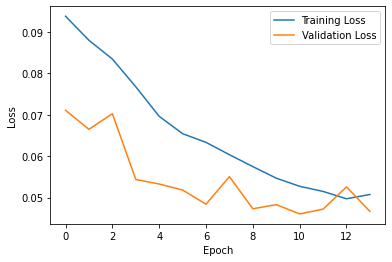

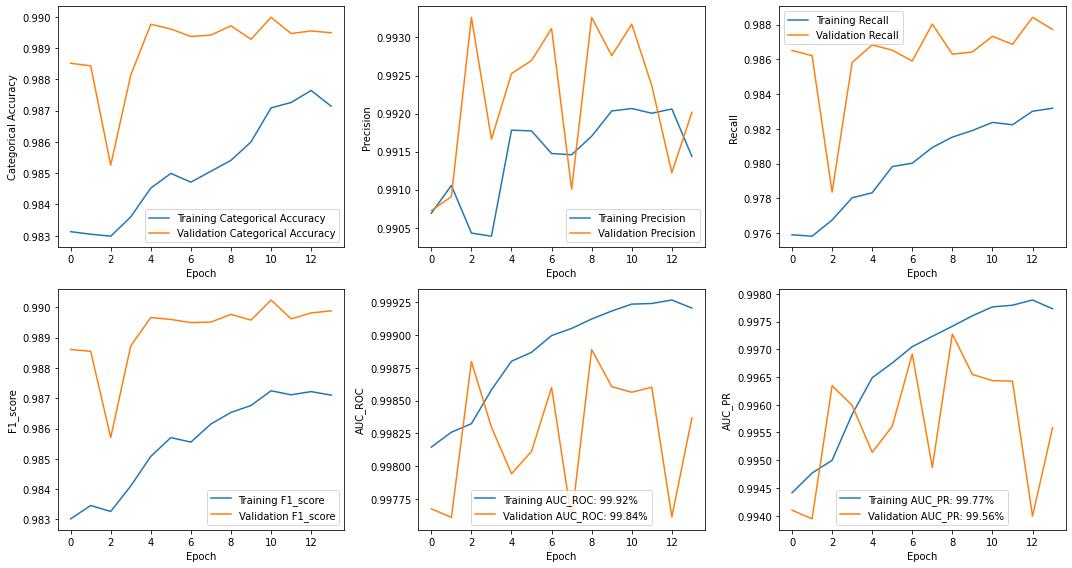

In [15]:
#Graphs generation
"""
Cell introduction:
-Plot graphs for the loss, sparse_categorical_accuracy or categorical_accuracy 
  for both training and validation.

Functions refrences:
plt: https://matplotlib.org/stable/api/pyplot_summary.html
.history: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History
"""
#_____________________________________________________________________________

#Plot the training and validation loss
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

if loss_function == 'categorical_crossentropy' or loss_function == 'binary_crossentropy':
    # create subplots with 2 rows and 3 columns
    fig, axs = plt.subplots(2, 3, figsize=(15, 8))
    if loss_function == 'categorical_crossentropy':
        # plot the accuracy curve
        axs[0, 0].plot(h['categorical_accuracy'], 
                       label='Training Categorical Accuracy')
        axs[0, 0].plot(h['val_categorical_accuracy'], 
                       label='Validation Categorical Accuracy')
        axs[0, 0].set_xlabel('Epoch')
        axs[0, 0].set_ylabel('Categorical Accuracy')
        axs[0, 0].legend()
    elif loss_function == 'binary_crossentropy':
        # plot the accuracy curve
        axs[0, 0].plot(h['accuracy'], label='Training Accuracy')
        axs[0, 0].plot(h['val_accuracy'], label='Validation Accuracy')
        axs[0, 0].set_xlabel('Epoch')
        axs[0, 0].set_ylabel('Accuracy')
        axs[0, 0].legend()

    # plot the precision curve
    axs[0, 1].plot(h['precision'], label='Training Precision')
    axs[0, 1].plot(h['val_precision'], label='Validation Precision')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Precision')
    axs[0, 1].legend()

    # plot the recall curve
    axs[0, 2].plot(h['recall'], label='Training Recall')
    axs[0, 2].plot(h['val_recall'], label='Validation Recall')
    axs[0, 2].set_xlabel('Epoch')
    axs[0, 2].set_ylabel('Recall')
    axs[0, 2].legend()

    # plot the f1_score curve
    axs[1, 0].plot(h['f1_score'], label='Training F1_score')
    axs[1, 0].plot(h['val_f1_score'], label='Validation F1_score')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('F1_score')
    axs[1, 0].legend()

    # plot the auc_roc curve
    axs[1, 1].plot(h['auc_roc'], label='Training AUC_ROC: {:.2%}'.format(h['auc_roc'][-1]))
    axs[1, 1].plot(h['val_auc_roc'], label='Validation AUC_ROC: {:.2%}'.format(h['val_auc_roc'][-1]))
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('AUC_ROC')
    axs[1, 1].legend()

    # plot the auc_pr curve
    axs[1, 2].plot(h['auc_pr'], label='Training AUC_PR: {:.2%}'.format(h['auc_pr'][-1]))
    axs[1, 2].plot(h['val_auc_pr'], label='Validation AUC_PR: {:.2%}'.format(h['val_auc_pr'][-1]))
    axs[1, 2].set_xlabel('Epoch')
    axs[1, 2].set_ylabel('AUC_PR')
    axs[1, 2].legend()

    plt.tight_layout()
    plt.show()

elif loss_function == 'sparse_categorical_crossentropy':
    #Plot the sparse_categorical_accuracy curve
    plt.plot(h['sparse_categorical_accuracy'], 
             label='Training Sparse Categorical Accuracy')
    plt.plot(h['val_sparse_categorical_accuracy'], 
             label='Validation Sparse Categorical Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Sparse Categorical Accuracy')
    plt.legend()
    plt.show()
else:
    raise ValueError('Invalid loss function')

**Model prediction**

-Applying the model prediction of masks based on the test images.

In [16]:
#Model prediction
"""
Cell introduction:
-Applying the model prediction of masks based on the test images.
-Print type, shape, range and size of the prediction data after training.

Functions refrences:
model.predict: https://www.tensorflow.org/api_docs/python/tf/keras/Model
"""
#_____________________________________________________________________________

#prediction of masks based on test images
prediction = model.predict(X_test)

#Print "test masks" type, shape, range, size:
print("prediction Type:", prediction.dtype)
print("prediction Shape:", prediction.shape)
print("prediction Range:", np.min(prediction), np.max(prediction))
print("prediction Size:", prediction.nbytes/1024/1024, "MB")

3/3 [==============================] - 6s 177ms/step
prediction Type: float32
prediction Shape: (79, 256, 256, 8)
prediction Range: 1.4209479e-07 0.999936
prediction Size: 158.0 MB


**Model evaluation**

-Evaluate the model accoding to the test dataset.

-Export the loss and the metrics for represention.

In [17]:
#Model evaluation
"""
Cell introduction:
-Evaluate the model accoding to the test dataset.
-Export the loss and the metrics for represention.

Functions refrences:
model.evaluate: https://www.tensorflow.org/api_docs/python/tf/keras/Model
"""
#_____________________________________________________________________________

#evaluate the model with loss and metrics
if loss_function == 'binary_crossentropy':
    loss, accuracy, precision, recall, f1_score, auc_roc, auc_pr = model.evaluate(X_test, y_test)
    print('Test loss:', loss)
    print('Test Accuracy:', accuracy)
    print('Test Precision:', precision)
    print('Test Recall:', recall)
    print('Test F1_score:', f1_score)
    print('Test AUC_ROC:', auc_roc)
    print('Test AUC_PR:', auc_pr)
elif loss_function == 'categorical_crossentropy':
    loss, categorical_accuracy, precision, recall, f1_score, auc_roc, auc_pr = model.evaluate(X_test, y_test)
    print('Test loss:', loss)
    print('Test Categorical Accuracy:', categorical_accuracy)
    print('Test Precision:', precision)
    print('Test Recall:', recall)
    print('Test F1_score:', f1_score)
    print('Test AUC_ROC:', auc_roc)
    print('Test AUC_PR:', auc_pr)
elif loss_function == 'sparse_categorical_crossentropy':
    loss, sparse_categorical_accuracy = model.evaluate(X_test, y_test)
    print('Test loss:', loss)
    print('Test Sparse Categorical Accuracy:', sparse_categorical_accuracy)
else:
    raise ValueError('Invalid loss function')

3/3 [==============================] - 1s 322ms/step - loss: 0.0873 - categorical_accuracy: 0.9796 - precision: 0.9848 - recall: 0.9757 - f1_score: 0.9798 - auc_roc: 0.9969 - auc_pr: 0.9916
Test loss: 0.08725734800100327
Test Categorical Accuracy: 0.9795661568641663
Test Precision: 0.9847791790962219
Test Recall: 0.9757153391838074
Test F1_score: 0.9797758460044861
Test AUC_ROC: 0.9969131946563721
Test AUC_PR: 0.991572380065918


**Plot section**

-Some plot functions for data before, during and after the training process.

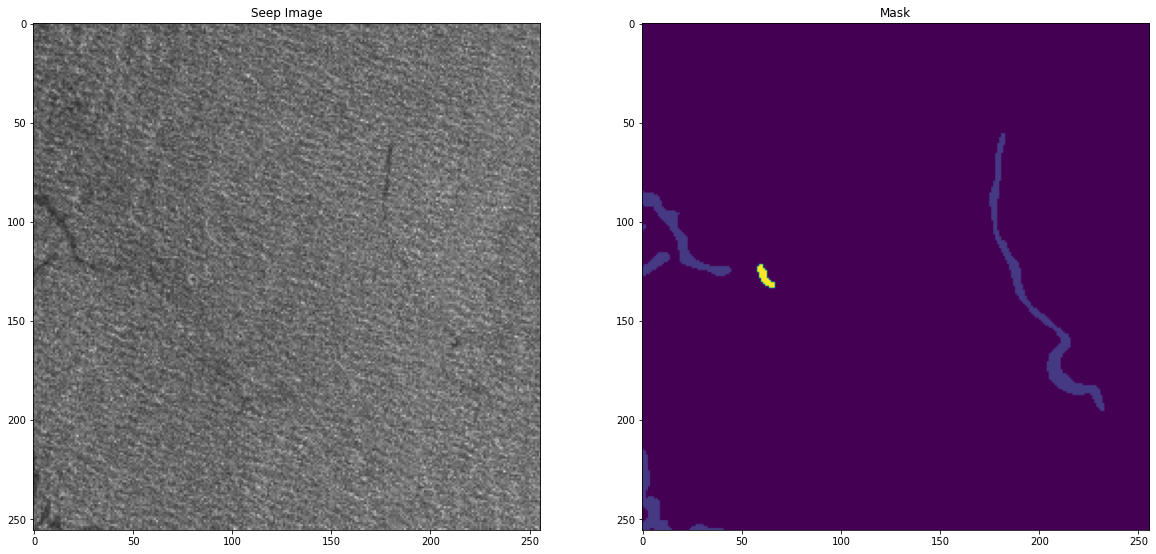

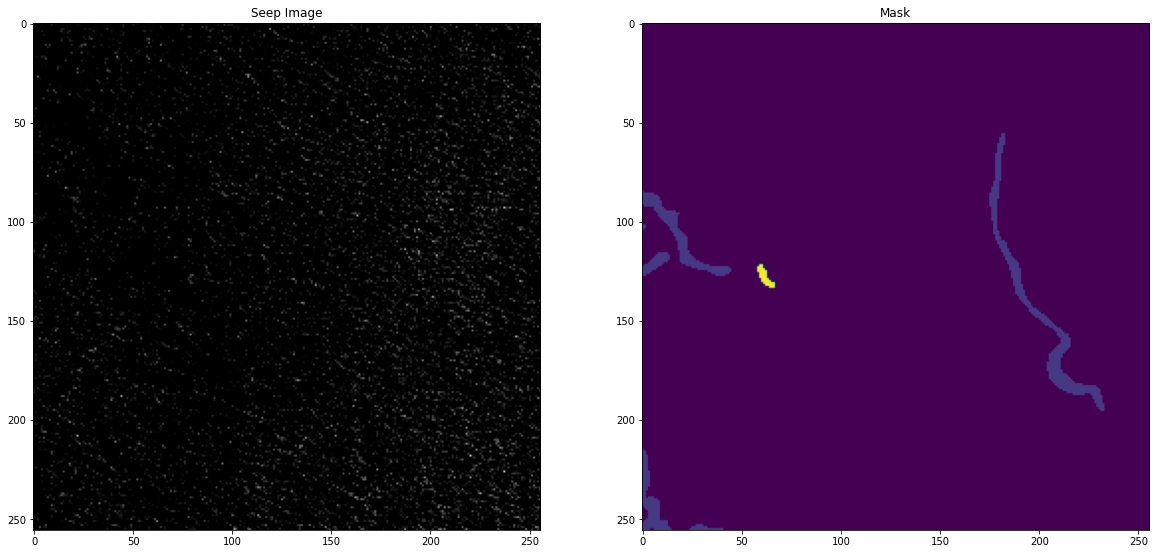

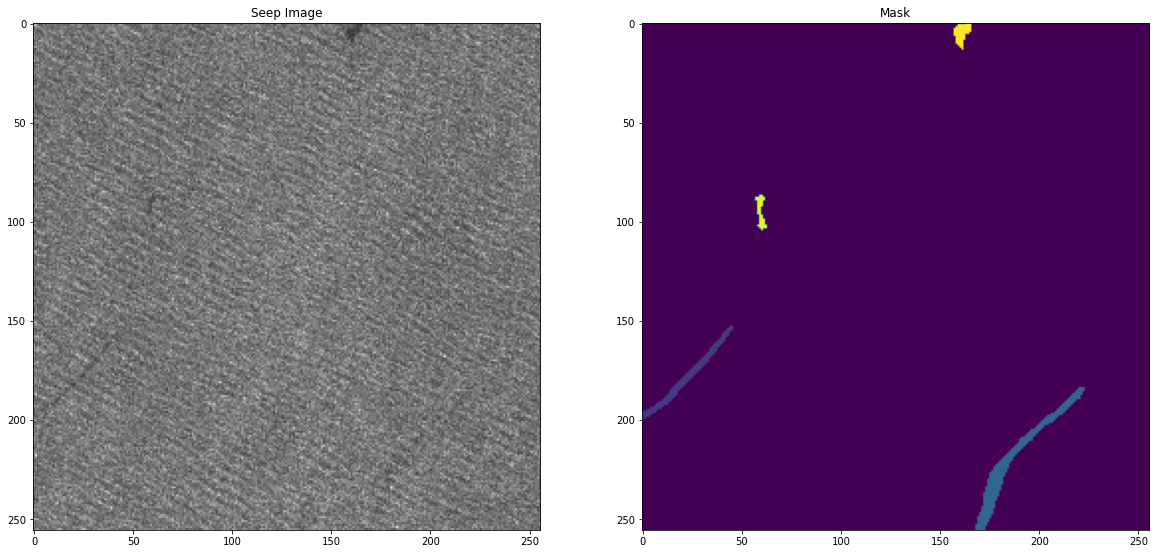

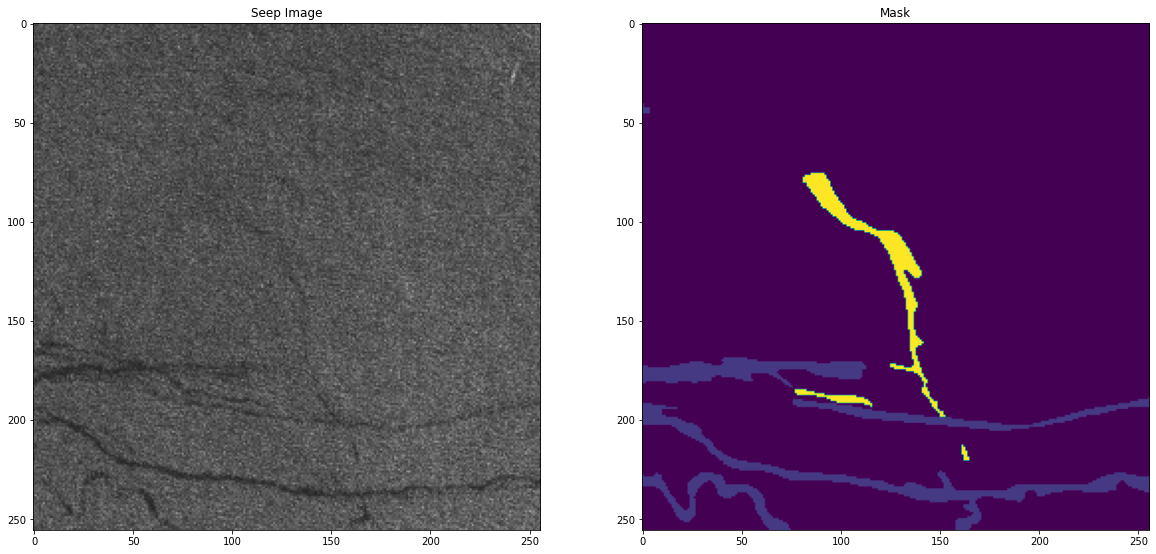

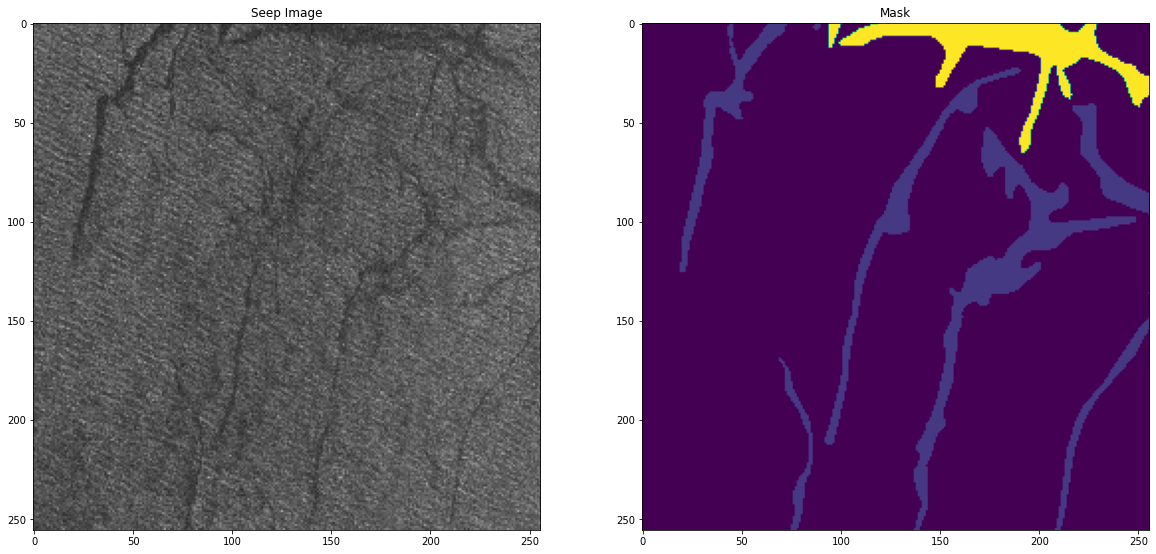

In [14]:
#Plot image with its original mask before training 

#Plot function
def plot_image_mask (img, mask):
  fig, ax = plt.subplots(1, 2, figsize=(20, 16))
  ax[0].imshow(img)
  ax[0].set_title("Seep Image")
  ax[1].imshow(mask)
  ax[1].set_title("Mask")
  plt.show()

#Choose an ID and it prints images from the original images/masks, processed, 
#training, validation and testing datasets.
id=11
plot_image_mask(images[id], masks[id])
plot_image_mask(images_process[id], masks_process[id])
plot_image_mask(((X_train[id] + 1) / 2), y_train[id])
plot_image_mask(((X_val[id] + 1) / 2), y_val[id])
plot_image_mask(((X_test[id] + 1) / 2), y_test[id])

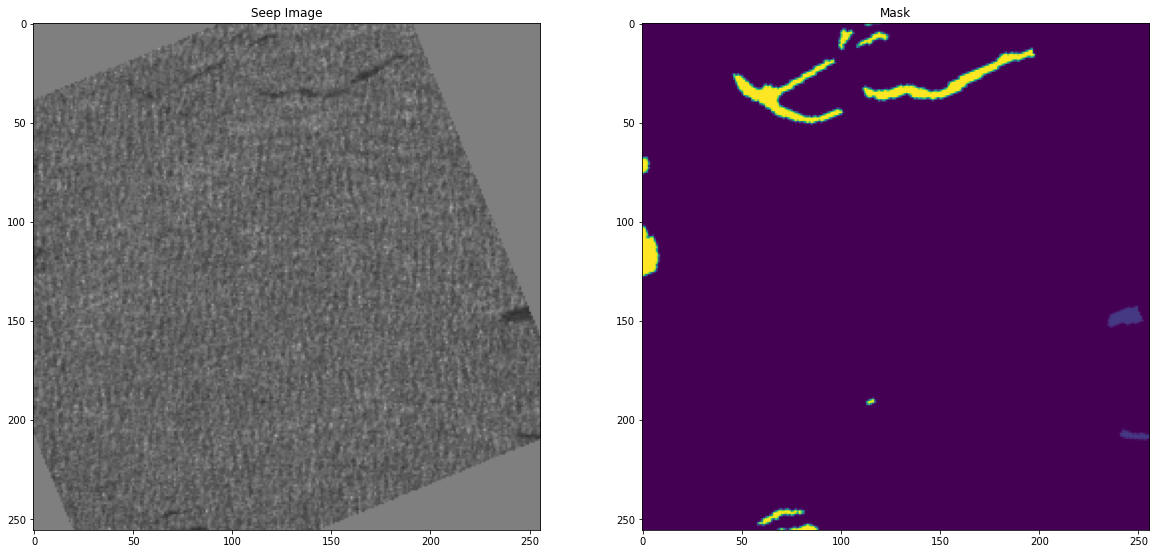

In [15]:
#Plot images and masks from a generator

#Plot function
def plot_image_mask (img, mask):
  fig, ax = plt.subplots(1, 2, figsize=(20, 16))
  ax[0].imshow(img)
  ax[0].set_title("Seep Image")
  ax[1].imshow(mask)
  ax[1].set_title("Mask")
  plt.show()

if enable_augmentation == True:
    #Get the first augmented image from the batch
    augmented_image = image_generator [2]
    augmented_mask = mask_generator [2]

    #Choose an ID and it prints images from the augmented images/masks datasets.
    id=14
    plot_image_mask(((augmented_image[id] + 1) / 2), augmented_mask[id])
else:
    print('Data Augmentation is disabled')

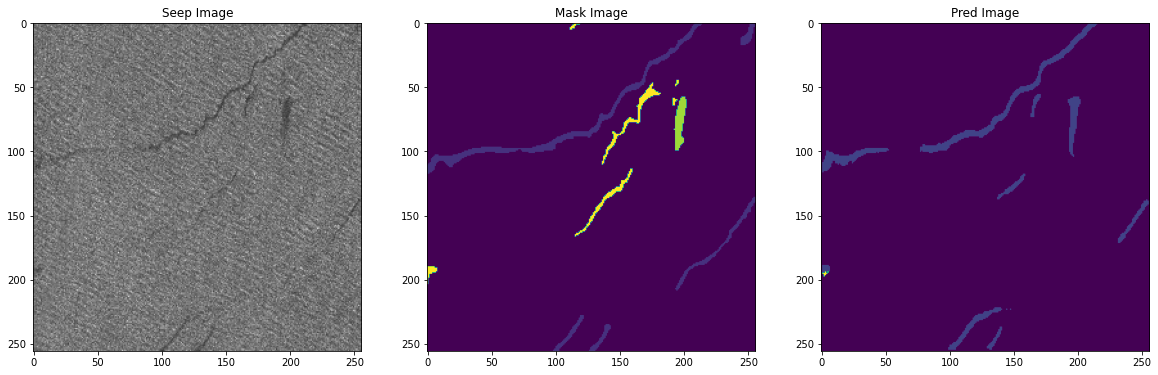

In [18]:
#Plot image with its ground truth mask and predicted mask

#Plot function
def plot_image_mask (img, mask, pred):
  fig, ax = plt.subplots(1, 3, figsize=(20, 16))
  ax[0].imshow(img)
  ax[0].set_title("Seep Image")
  ax[1].imshow(mask)
  ax[1].set_title("Mask Image")
  ax[2].imshow(pred)
  ax[2].set_title("Pred Image")
  plt.show()

#Choose an ID and it prints a SAR image with its true and predicted masks.
id = 3
img = ((X_test[id] + 1) / 2)
pred = np.argmax(prediction[id], axis=-1)
if loss_function == 'binary_crossentropy'or loss_function == 'categorical_crossentropy':
    msk = np.argmax(y_test[id], axis=-1)
elif loss_function == 'sparse_categorical_crossentropy':
    msk = y_test[id] 
else:
    raise ValueError('Invalid loss function')

plot_image_mask(img, msk, pred)

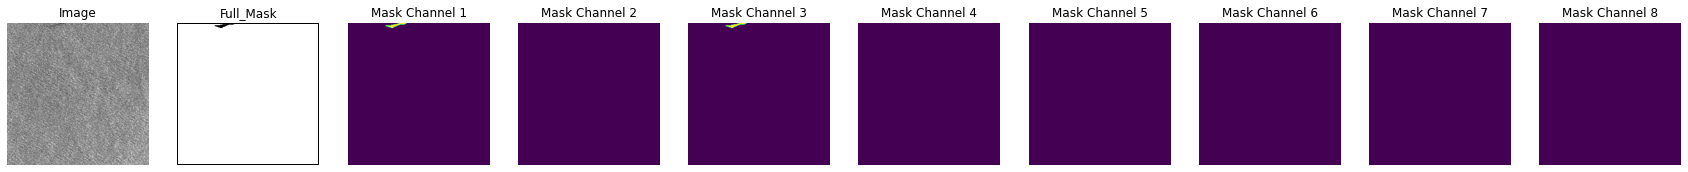

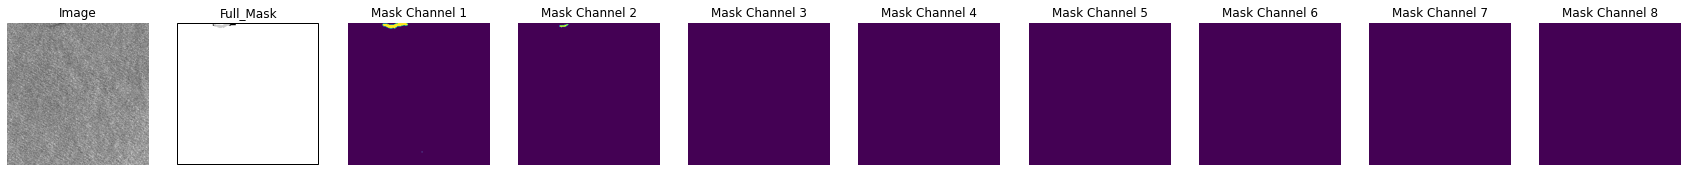

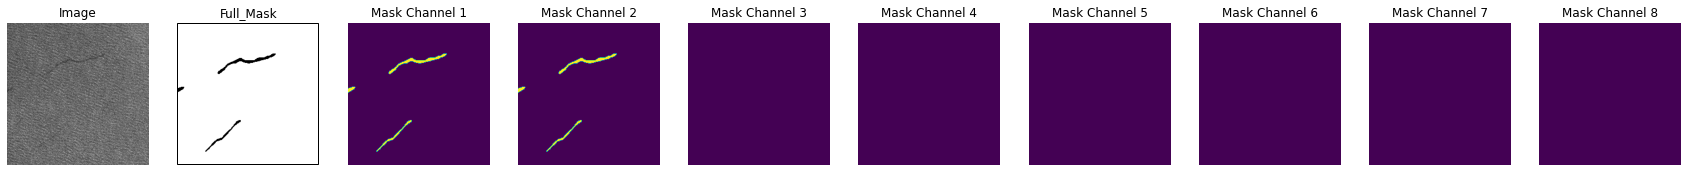

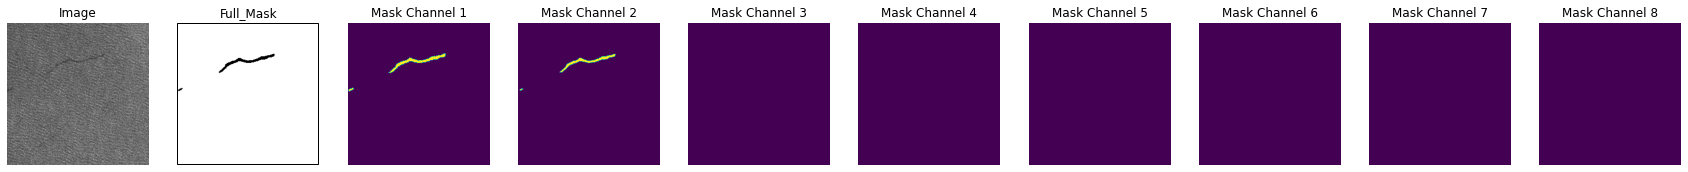

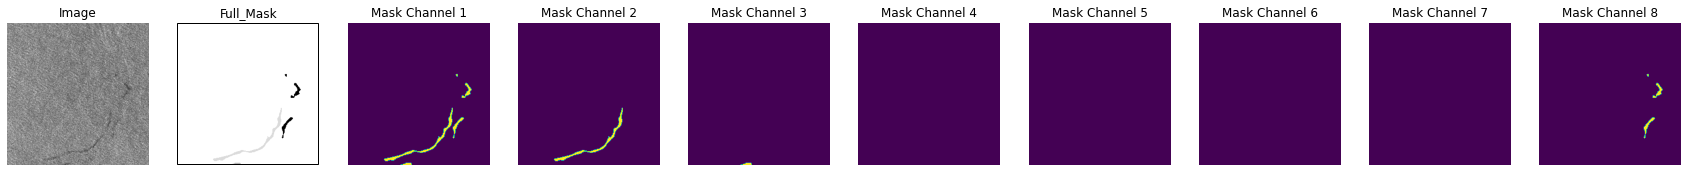

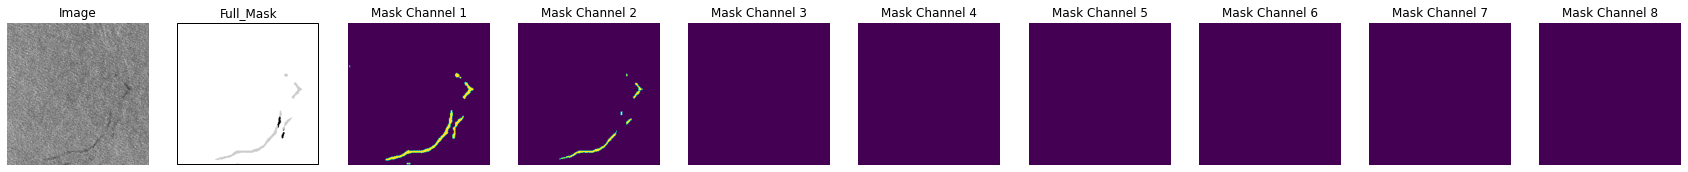

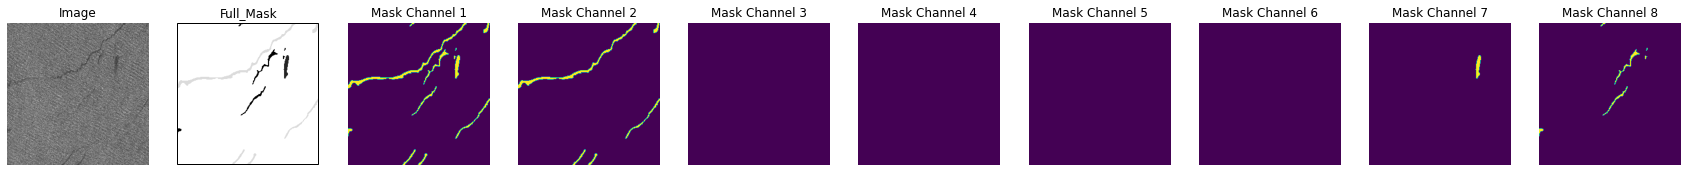

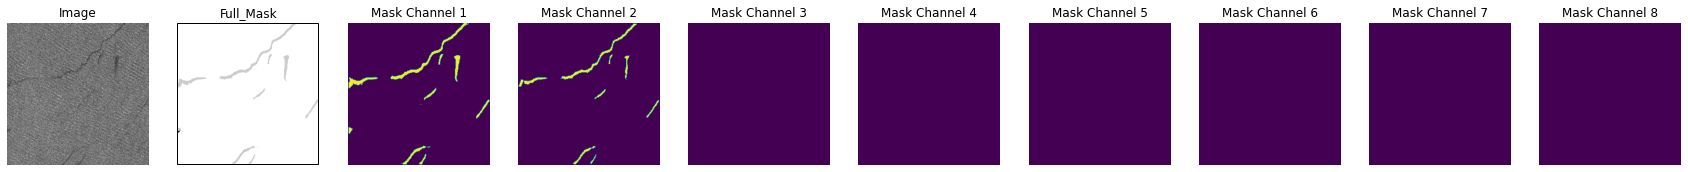

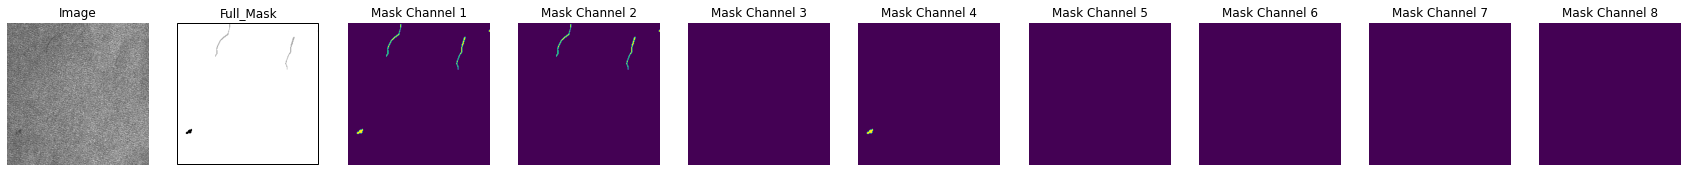

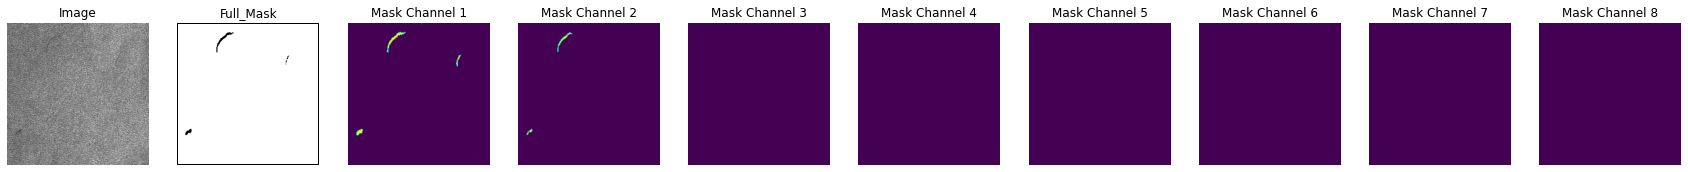

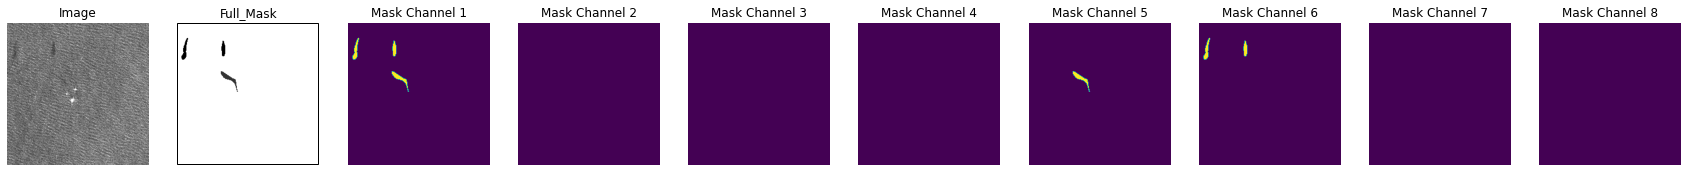

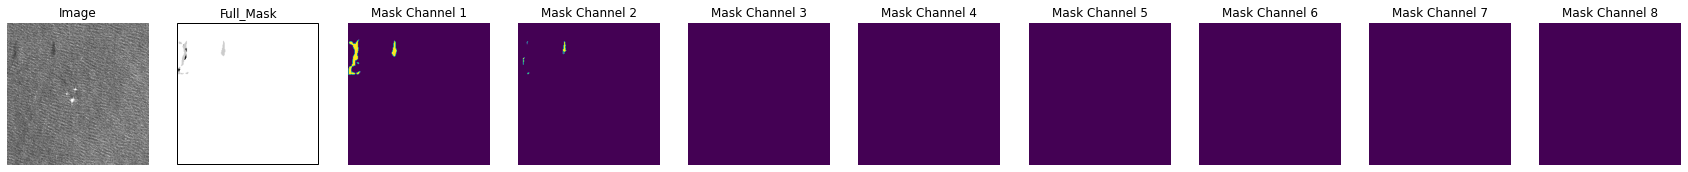

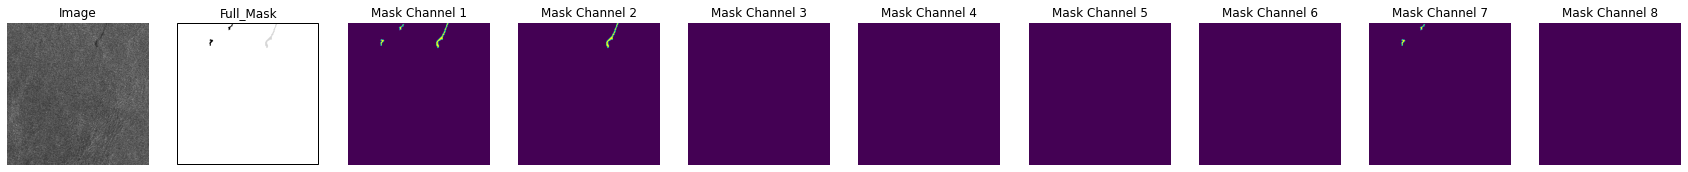

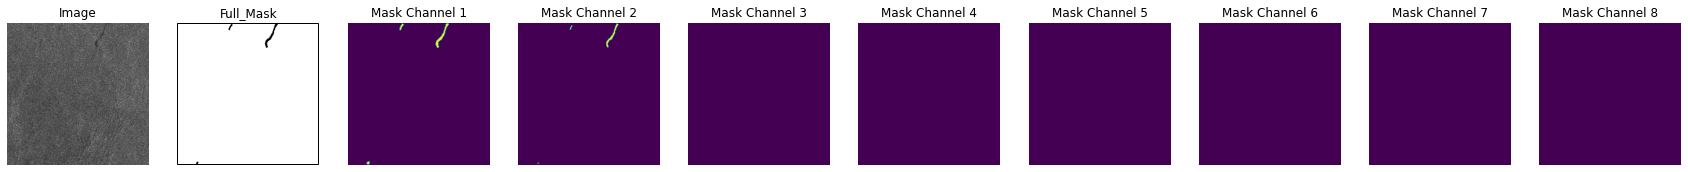

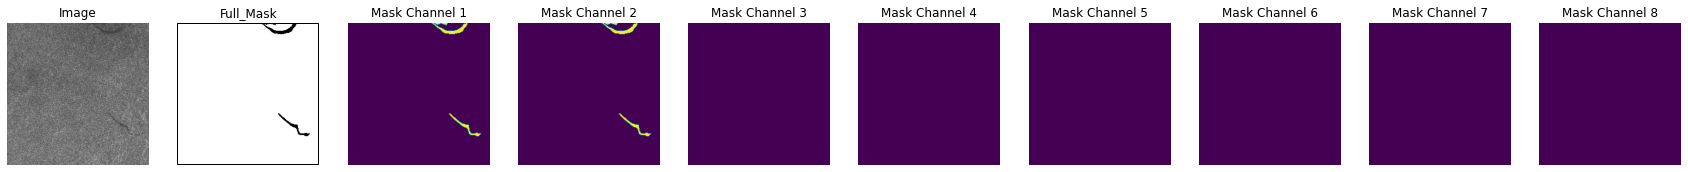

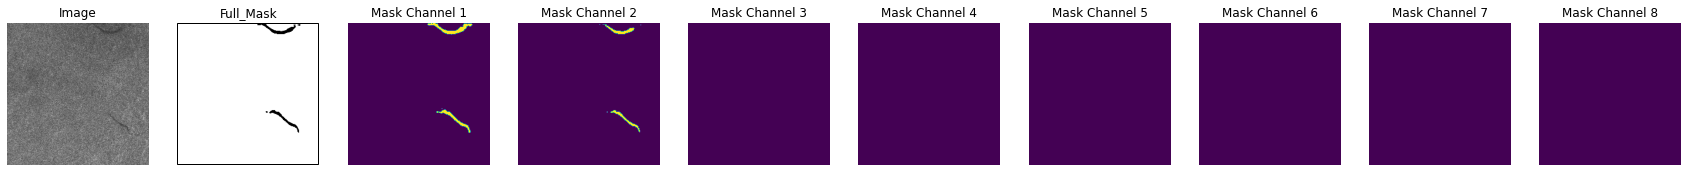

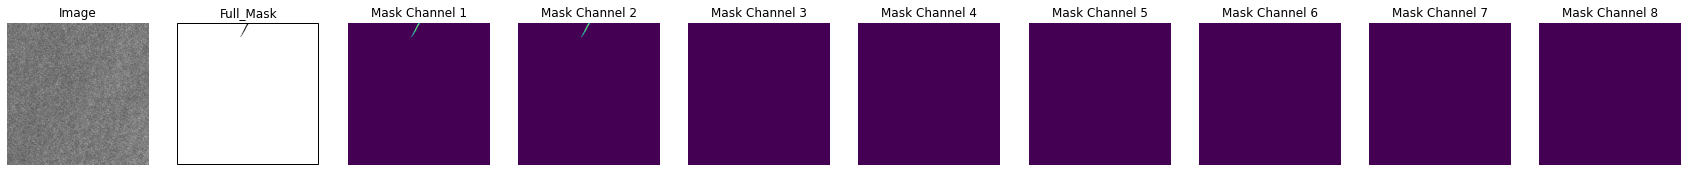

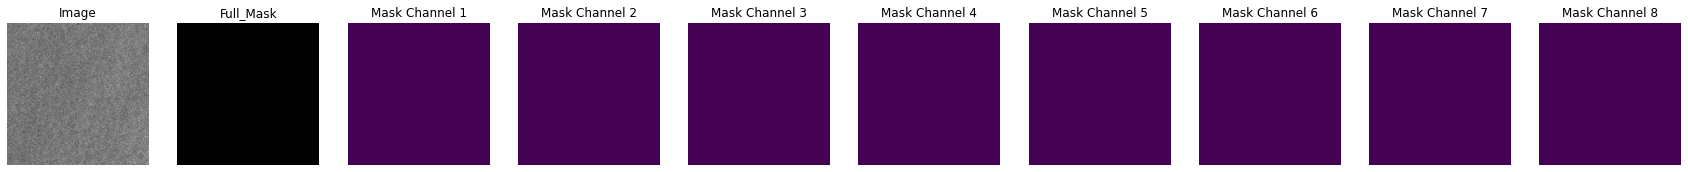

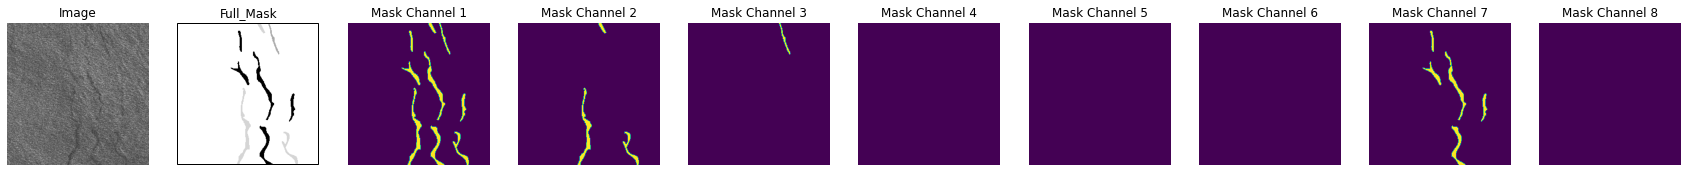

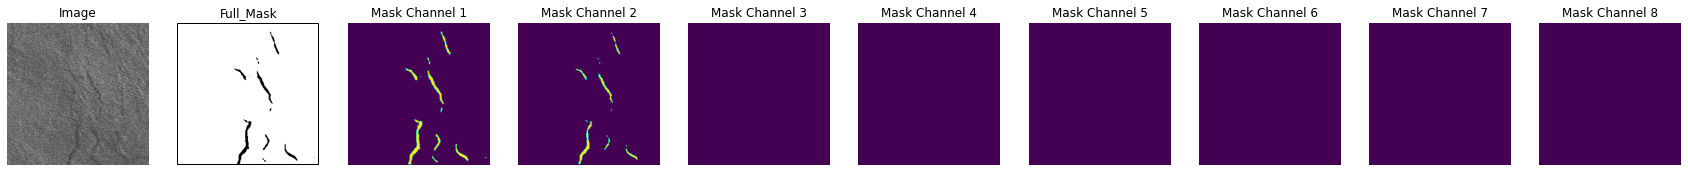

In [19]:
#Plot image with its ground layered truth masks and layered predicted masks
#Plot image with mask in each of the 8 channels

#Plot function
def plot_image_mask(image, mask):
    fig, axes = plt.subplots(nrows=1, ncols=mask.shape[-1]+2, figsize=(30, 30))
    
    #Plot the image
    axes[0].imshow(image)
    axes[0].axis('off')
    axes[0].set_title('Image')

    #Plot the full mask
    axes[1].imshow((1- np.argmax(mask, axis=-1)), cmap='gray')
    axes[1].axis('off')
    axes[1].set_title('Full_Mask')
    frame = plt.Rectangle((-1, -1), mask.shape[1]-1, mask.shape[0]-1, 
                          linewidth=1, edgecolor='black', facecolor='none')
    axes[1].add_artist(frame)

    # Plot each channel of the mask
    for i in range(mask.shape[-1]):
        mask_channel = np.round(mask[...,i]).astype(np.uint8)
        if i == 0:
            mask_channel = 1 - mask_channel
        axes[i+2].imshow(mask_channel)
        axes[i+2].axis('off')
        axes[i+2].set_title(f'Mask Channel {i+1}')

#Choose an ID and it prints a SAR image with its full mask plus 8 masks, with
#each representing a seepage level. It is applied twich, one represents ground 
#truth masks and the other for predicted masks.
for i in range(10): #(range(prediction.size)-1):
  id = i
  img = ((X_test[id] + 1) / 2)
  pred = prediction[id]
  if loss_function == 'binary_crossentropy'or loss_function == 'categorical_crossentropy':
      msk = y_test[id]
  elif loss_function == 'sparse_categorical_crossentropy':
      msk = to_categorical(y_test, num_classes=8)[id]
  else:
      raise ValueError('Invalid loss function')

  plot_image_mask(img, msk)
  plot_image_mask(img, pred)